# What is K-means ?
It’s an unsupervised algorithm that groups data into k clusters

## Steps:

First we have to decide the number of K Clusters to use using the Elbow Method. 
The Elbow Method helps us figure out the best number of clusters to use.
We run K-Means with different values of k and plot how the total distance between points and their centroids (called inertia) changes.As k increases, the distances drop — but at some point, they stop improving much.
That turning point or elbow point, is where we pick the ideal number of clusters

- We pick k random points as centroids or centers of clusters (mood playlist will be the centriod and all data points are the songs ) 
- Then we assign every other data point to the nearest Centroid by calculating the Eucledian Distance 
- Then Recompute centroids as the average of all assigned points
- Repeat steps 2–3 until convergence (centroids stop moving)

In [51]:
import numpy as np # for mathematical operations
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for visualization

In [52]:
# Loading the data
scaled_df=pd.read_csv(r"C:\Users\Tanvi\Desktop\Datasets\spotify_scaled_features1.csv")
scaled_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.890935,1.286908,1.290703,-0.367970,0.683376,-0.489819,0.660661,1.380744,1.595607,-1.141368
1,0.191994,0.630249,0.668683,-0.183082,-0.345467,-0.489819,-0.322835,1.388435,1.823253,-0.821867
2,0.585296,-1.669954,-0.718402,-0.455832,1.644570,-0.489819,-0.564927,-0.334212,-0.588326,-0.545298
3,-1.693703,-0.929789,-0.434817,-0.438044,0.942701,-0.489819,-0.587623,-0.876384,1.750597,-0.695295
4,-1.203422,-1.313157,-1.930601,-0.405163,1.638932,-0.083566,-0.065613,-0.249618,0.741433,-1.282184


***Converting the data to numpy array because it will be easy for performing mathematical calculations like calculating the distance in K-means***

In [53]:
X=scaled_df.values

In [54]:
X

array([[-0.89093479,  1.28690794,  1.29070344, ...,  1.38074423,
         1.5956073 , -1.14136792],
       [ 0.19199369,  0.6302493 ,  0.66868254, ...,  1.38843461,
         1.82325339, -0.82186742],
       [ 0.58529607, -1.66995381, -0.7184024 , ..., -0.33421214,
        -0.5883258 , -0.54529771],
       ...,
       [-0.20130869, -0.57678797,  0.21471231, ...,  1.37689903,
        -1.08520529, -0.57310266],
       [ 1.02708778,  0.50499071,  0.40560321, ...,  0.13105629,
        -0.57075233, -0.10661512],
       [ 1.09712793, -0.38320652,  0.47712477, ...,  0.09260435,
        -0.12199762,  0.73909427]])

In [55]:
X.shape

(232725, 10)

# Initializing k Centroids

In [56]:
def initialize_centroids(X,k): # This method will create k points as clusters from the X dataset 
    indices=np.random.choice(X.shape[0],k,replace=False) #x.shape[0] gives number of rows and replace=False means pick without replacement
    centroids=X[indices]
    return centroids 


# Assign every other data point to the nearest Centroid by calculating the Eucledian Distance

When clustering songs, we need to figure out how close each song is to each cluster center (centroid).
This is where np.linalg.norm() comes in — its like a digital measuring tape that calculates the distance between two points.
In K-Means, we use this to find out Which centroid is closest to this song based on its features like energy, danceability etc.
The np.linalg.norm() function helps us calculate the Euclidean distance, basically, the straight-line distance — between each song and each centroid.

In [57]:
def assign_clusters(X,centroids):
    distance=np.linalg.norm(X[:,np.newaxis]-centroids,axis=2)#We are subtracting each point in X from the centroid and this will
    # result in a 3D array (n_points,n_centroids, n_features) , axis=2 For 3D arrays - across depth, for vector comparison
     
    # give the index of nearest centroid using np.argmin
    cluster_labels=np.argmin(distance,axis=1)
    return cluster_labels

# Recalculate the centroids as the average of all assigned points

Now each cluster is having a bunch of songs(points) inside it and we need to find a new centre or average of those songs

In [58]:
def recalculate_centroids(X,cluster_labels,k):
    new_centroids=[]
    for i in range(k): # Going through each centroid one by one
        cluster_points=X[cluster_labels==i] # Only those points who were assigned cluster i
        # Now that we have all the points belonging to a cluster i we will take the new average for these points
        # And again find new clusters 
        new_centroids.append(cluster_points.mean(axis=0)) # take average of all features like dancebility , energy etc
    return np.array(new_centroids)
    

# Now Repeat until the Centroids Stop Moving

In [59]:
def kmeans_algo(X,k,max_iters=100): # Inputs is X points , k clusters and max iterations as 100
    # First initialize the centroids
    centroids=initialize_centroids(X,k)
    
    for i in range(max_iters):
        cluster_labels=assign_clusters(X,centroids) # Assign a centroid to each and every data point or song
        new_centroids=recalculate_centroids(X,cluster_labels,k)
        
        if np.allclose(centroids,new_centroids): # allclose checks if the new centroids are same as the old ones
            print(f'We have converged to the best solution after {i+1} iterations')
            break
            
        # Else the old centroids will be replaced with the new ones
        centroids= new_centroids
    return cluster_labels,centroids

# Visualizing the Clusters using PCA

This data has too many features, so it will be quite complicated to plot them directly . So I will be using PCA (Principle
Component Analysis) just so that I understand the clusters better.

In [60]:
from sklearn.decomposition import PCA  # to reduce features to 2D
import matplotlib.pyplot as plt

pca=PCA(n_components=2) 
X_pca=pca.fit_transform(X)# Turn the multi feature data into just 2 features that best capture the pattern

In [61]:
X_pca.shape  

(232725, 2)

Now X_pca has exactly 2 features 

In [62]:
k = 3
labels, centroids = kmeans_algo(X, k)

We have converged to the best solution after 22 iterations


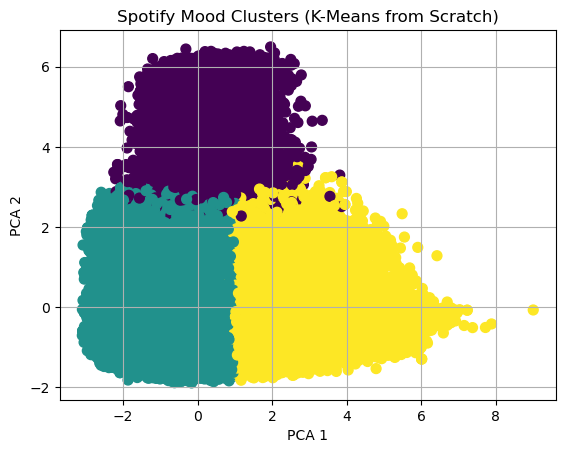

In [63]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Spotify Mood Clusters (K-Means from Scratch)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

In the above scatter plot , K means has succesfully grouped all the similary songs together 

# Implementing the Elbow Curve

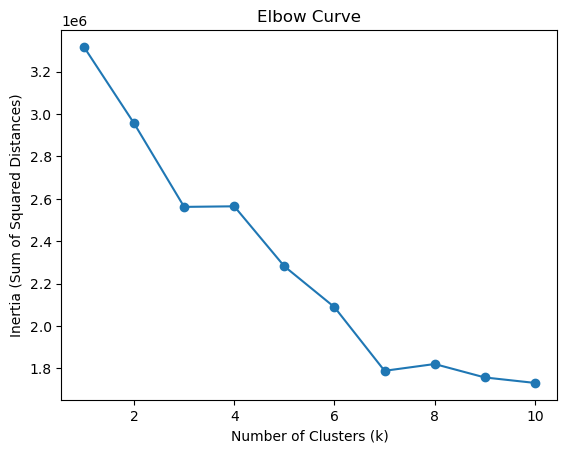

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_inertia(X, centroids, cluster_labels):
    # Calculate the inertia (sum of squared distances between points and centroids)
    inertia = np.sum((X - centroids[cluster_labels])**2)
    return inertia

# Range of k values to test
k_values = range(1, 11)

inertia_values = []

# Loop over different k values
for k in k_values:
    centroids = initialize_centroids(X, k)
    cluster_labels = assign_clusters(X, centroids)
    
    # Calculate inertia for the current k value
    inertia = calculate_inertia(X, centroids, cluster_labels)
    inertia_values.append(inertia)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Curve')
plt.show()


### In the above figure, k=3 seems to be the optimal number of clusters in this case, there is a sharp drop in inertia between k=1 and k=3, and after k=3, the rate of change slows down significantly. The elbow point generally indicates the most appropriate number of clusters to choose.